# CMAPSS Deeplearning Approach

## CMAPSS Dataset Preperation

In [2]:
import pandas as pd
train_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/train_FD001.txt",sep = ' ', header=None)
train_FD001.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [3]:
def clean_train_data(df: pd.DataFrame):

    """
    This function assigns column names to the DataFrame, drops specified columns,
    and adds a Remaining Useful Life (RUL) column.

    Parameters:
    df (pd.DataFrame): Input DataFrame to be cleaned.

    Returns:
    pd.DataFrame: Cleaned DataFrame with RUL column added.
    """
    # Rename the columns
    columns =['id',
            'cycle',
            'setting1',
            'setting2',
            'setting3',
            'T2_Total_temperature_at_fan_inlet',
            'T24_Total_temperature_at_LPC_outlet',
            'T30_Total_temperature_at_HPC_outlet',
            'T50_Total_temperature_at_LPT_outlet',
            'P2_Pressure_at_fan_inlet',
            'P15_Total_pressure_in_bypass_duct',
            'P30_Total_pressure_at_HPC_outlet',
            'Nf_Physical_fan_speed',
            'Nc_Physical_core_speed',
            'epr_Engine_pressure_ratio',
            'Ps30_Static_pressure_at_HPC_outlet',
            'phi_Ratio_of_fuel_flow_to_Ps30',
            'NRf_Corrected_fan_speed',
            'NRc_Corrected_core_speed',
            'BPR_Bypass_Ratio',
            'farB_Burner_fuel_air_ratio',
            'htBleed_Bleed_Enthalpy',
            'Nf_dmd_Demanded_fan_speed',
            'PCNfR_dmd_Demanded_corrected_fan_speed',
            'W31_HPT_coolant_bleed',
            'W32_LPT_coolant_bleed',
            'sm22',
            'sm23']

    # Assign the column names to the DataFrame
    df.columns = columns

    # Add Remaining Useful Life (RUL) column
    max_cycle = df.groupby('id')['cycle'].max()
    df = df.merge(max_cycle, on='id', suffixes=('', '_max'))
    df['RUL'] = df['cycle_max'] - df['cycle']
    df = df.drop(columns=['cycle_max'])

    # Columns to drop
    columns_to_drop = ['sm22', 'sm23', 'setting3', 'T2_Total_temperature_at_fan_inlet', 'P2_Pressure_at_fan_inlet', "P15_Total_pressure_in_bypass_duct",
            'epr_Engine_pressure_ratio', 'farB_Burner_fuel_air_ratio', 'Nf_dmd_Demanded_fan_speed',
            'PCNfR_dmd_Demanded_corrected_fan_speed']

    # Drop the specified columns
    cleaned_train_df= df.drop(columns_to_drop, axis=1)

    return cleaned_train_df

In [4]:
data = clean_train_data(train_FD001)
data.head(2)

,id,cycle,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190


In [5]:
data.shape

(20631, 19)

In [ ]:
data_train = data[data['id'] <= 80]
data_test = data[data['id'] > 80]
#y_train = y[:len(X_train)]
#y_test = y[len(X_train):]
data_train.shape

In [ ]:
data_train.shape, data_test.shape

In [8]:
'''
data_tobe_scaled = data.drop(columns = ['id','cycle','RUL'])
data_remaining = data[['id','cycle','RUL']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_normalized = scaler.fit_transform(data_tobe_scaled)
data_scaled = pd.DataFrame(features_normalized, columns=data_tobe_scaled.columns)
data_sequence_RNN = pd.concat([data_remaining, data_scaled], axis = 1)
data_sequence_RNN.head()
'''

,id,cycle,RUL,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed
0,1,1,191,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,1,2,190,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,1,3,189,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,1,4,188,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,1,5,187,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


In [9]:
import numpy as np

def data_preperation_RNN(data, seq_length=50):
    #This function create a sequence of the data in (n_seq, n_obs, n_features) format to train DL methods
    sequences = []
    labels = []
    for unit in data['id'].unique():
        unit_data = data[data['id'] == unit].sort_values(by='cycle')
        num_sequences = len(unit_data) - seq_length + 1
        for i in range(num_sequences):
            seq = unit_data.iloc[i: i+seq_length]
            sequences.append(seq.drop(columns=['id', 'cycle', 'RUL']).values)
            labels.append(seq['RUL'].values[-1])
    return np.array(sequences), np.array(labels)

In [10]:
# Create sequences
seq_length = 20
X_train, y_train = data_preperation_RNN(data_train, seq_length=seq_length)
X_test, y_test= data_preperation_RNN(data_test, seq_length=seq_length)
# Save the prepared sequences (optional)
#np.save('X_train_FD001.npy', X)
#np.save('y_train_FD001.npy', y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18731, 20, 16), (18731,))

In [11]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)
y_train.shape, y_test.shape

(18731, 1)

In [12]:
engine_1 = pd.DataFrame(X[0], columns = data_tobe_scaled.columns)
engine_1

,setting1,setting2,T24_Total_temperature_at_LPC_outlet,T30_Total_temperature_at_HPC_outlet,T50_Total_temperature_at_LPT_outlet,P30_Total_pressure_at_HPC_outlet,Nf_Physical_fan_speed,Nc_Physical_core_speed,Ps30_Static_pressure_at_HPC_outlet,phi_Ratio_of_fuel_flow_to_Ps30,NRf_Corrected_fan_speed,NRc_Corrected_core_speed,BPR_Bypass_Ratio,htBleed_Bleed_Enthalpy,W31_HPT_coolant_bleed,W32_LPT_coolant_bleed
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044
5,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391.0,38.98,23.3669
6,0.0010,0.0001,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392.0,39.10,23.3774
7,-0.0034,0.0003,642.56,1582.96,1400.97,553.85,2388.00,9040.80,47.24,522.47,2388.03,8131.07,8.4076,391.0,38.97,23.3106
8,0.0008,0.0001,642.12,1590.98,1394.80,553.69,2388.05,9046.46,47.29,521.79,2388.05,8125.69,8.3728,392.0,39.05,23.4066
9,-0.0033,0.0001,641.71,1591.24,1400.46,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,8.4286,393.0,38.95,23.4694


In [13]:
y[100]

array([72])

In [26]:
train_size = int(X.shape[0]*0.8)
train_size

14984

In [28]:
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14984, 20, 16), (3747, 20, 16), (14984, 1), (3747, 1))

In [16]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14984, 20, 16), (3747, 20, 16), (14984, 1), (3747, 1))

## Simple RNN

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Normalization

# Adapting a Normalization Layer to X_train
normalizer = Normalization()
normalizer.adapt(X_train)

# 1- RNN Architecture
model_RNN = Sequential()
model_RNN.add(normalizer)

model_RNN.add(SimpleRNN(100, return_sequences=True))
model_RNN.add(Dropout(0.2))
model_RNN.add(SimpleRNN(50, return_sequences=False))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(50, activation="relu"))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(1, activation='linear'))

# 2- Compilation
model_RNN.compile(loss='mse', 
              optimizer='rmsprop',
             metrics='mae')

In [42]:
model_RNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, None, 16)         33        
 ion)                                                            
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 100)         11700     
                                                                 
 dropout_9 (Dropout)         (None, None, 100)         0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)                7550      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                      

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)
# Fit
history_RNN = model_RNN.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=16, 
                    epochs=100, 
                    callbacks=[es],
                    verbose=1)

# Evaluate the model
#loss = model.evaluate(X_test, y_test)
#print(f'Test Loss and MAE: {loss}')

Epoch 1/100
750/750 [==============================] - 26s 29ms/step - loss: 3431.9756 - mae: 43.8807 - val_loss: 2416.1396 - val_mae: 37.0865
Epoch 2/100
750/750 [==============================] - 18s 24ms/step - loss: 2083.3750 - mae: 34.6171 - val_loss: 2459.0186 - val_mae: 37.3799
Epoch 3/100
750/750 [==============================] - 19s 26ms/step - loss: 1720.0131 - mae: 30.6835 - val_loss: 1691.8480 - val_mae: 29.4806
Epoch 4/100
750/750 [==============================] - 20s 26ms/step - loss: 1427.3236 - mae: 27.2755 - val_loss: 1938.5546 - val_mae: 28.4383
Epoch 5/100
750/750 [==============================] - 22s 29ms/step - loss: 1346.9664 - mae: 26.1916 - val_loss: 2008.2726 - val_mae: 29.7770
Epoch 6/100
750/750 [==============================] - 20s 27ms/step - loss: 1459.3000 - mae: 27.8494 - val_loss: 1757.5159 - val_mae: 28.2344
Epoch 7/100
750/750 [==============================] - 20s 27ms/step - loss: 1374.3298 - mae: 26.6687 - val_loss: 1903.1740 - val_mae: 29.2889

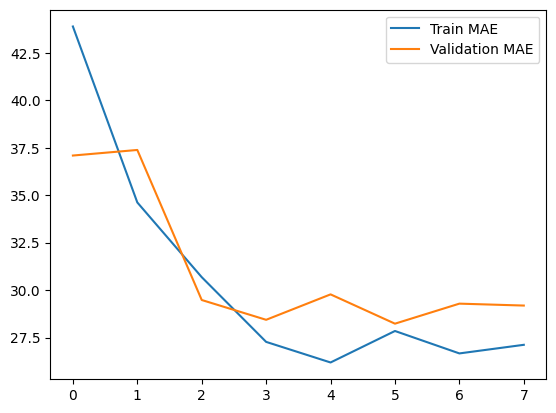

In [44]:
import matplotlib.pyplot as plt
plt.plot(history_RNN.history["mae"], label = "Train MAE")
plt.plot(history_RNN.history["val_mae"], label = "Validation MAE")
plt.legend()

In [45]:
normalizer.adapt(X_test)
RNN_mae = model_RNN.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {RNN_mae[1]:.4f}')

Model Mean Absolute Error 35.5674


In [48]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test set
y_pred_RNN = model_RNN.predict(X_test)

# Calculate R² score
r2_RNN = r2_score(y_test, y_pred_RNN)
print(f'R² score: {r2_RNN}')

# Calculate RMSE
rmse_RNN = np.sqrt(mean_squared_error(y_test, y_pred_RNN))
print(f'RMSE: {rmse_RNN}')

118/118 [==============================] - 1s 9ms/step
R² score: 0.5790853500366211
RMSE: 48.25285344607038


In [50]:
from tensorflow.keras import models

In [23]:
models.save_model(model_RNN, 'model_RNN')

INFO:tensorflow:Assets written to: model_RNN/assets


## LSTM

In [24]:
from tensorflow.keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(normalizer)
model_LSTM.add(LSTM(units=100, activation='tanh',return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=50, activation='tanh', return_sequences=False))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(50, activation="relu"))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1, activation='linear'))


model_LSTM.compile(loss='mse', 
                  optimizer='rmsprop',
                 metrics=['mae'])

In [25]:
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, None, 16)         33        
 ion)                                                            
                                                                 
 lstm (LSTM)                 (None, None, 100)         46800     
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                      

In [26]:
es = EarlyStopping(patience=5, restore_best_weights=True)

history_LSTM = model_LSTM.fit(X_train, y_train,
                              validation_split=0.2,
                              batch_size=16, 
                              epochs=100,
                              callbacks=[es],verbose=1)

2024-07-21 22:12:20.701917: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15343360 exceeds 10% of free system memory.


Epoch 1/100
750/750 [==============================] - 62s 57ms/step - loss: 3068.8303 - mae: 37.0828 - accuracy: 0.0050 - val_loss: 1254.2886 - val_mae: 24.5941 - val_accuracy: 0.0073
Epoch 2/100
750/750 [==============================] - 45s 60ms/step - loss: 1416.7281 - mae: 26.1385 - accuracy: 0.0052 - val_loss: 1140.7793 - val_mae: 24.1146 - val_accuracy: 0.0073
Epoch 3/100
750/750 [==============================] - 55s 73ms/step - loss: 1277.4236 - mae: 24.8069 - accuracy: 0.0051 - val_loss: 1010.5129 - val_mae: 22.0612 - val_accuracy: 0.0073
Epoch 4/100
750/750 [==============================] - 36s 48ms/step - loss: 1168.6447 - mae: 23.6399 - accuracy: 0.0051 - val_loss: 1009.4429 - val_mae: 22.0463 - val_accuracy: 0.0073
Epoch 5/100
750/750 [==============================] - 37s 49ms/step - loss: 1073.3138 - mae: 22.5103 - accuracy: 0.0051 - val_loss: 969.3439 - val_mae: 21.4870 - val_accuracy: 0.0073
Epoch 6/100
750/750 [==============================] - 34s 45ms/step - loss:

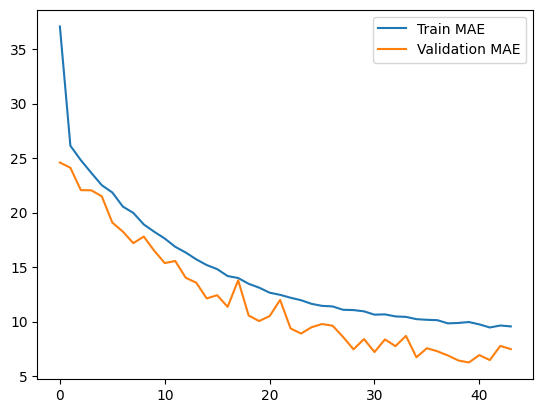

In [27]:
plt.plot(history_LSTM.history["mae"], label = "Train MAE")
plt.plot(history_LSTM.history["val_mae"], label = "Validation MAE")
plt.legend()

In [28]:
LSTM_mae = model_LSTM.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {LSTM_mae[1]:.4f}')

Model Mean Absolute Error 6.6691


In [29]:
models.save_model(model_LSTM, 'model_LSTM')

INFO:tensorflow:Assets written to: model_LSTM/assets


INFO:tensorflow:Assets written to: model_LSTM/assets


In [51]:
from tensorflow.keras import models

In [52]:
loaded_LSTM_model = models.load_model('model_LSTM')

In [53]:
# Predict on the test set
y_pred_LSTM = loaded_LSTM_model.predict(X_test)

# Calculate R² score
r2_LSTM = r2_score(y_test, y_pred_LSTM)
print(f'R² score: {r2_LSTM}')

# Calculate RMSE
rmse_LSTM = np.sqrt(mean_squared_error(y_test, y_pred_LSTM))
print(f'RMSE: {rmse_LSTM}')

118/118 [==============================] - 6s 19ms/step
R² score: 0.9835196137428284
RMSE: 9.547937908313818
